In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri dosyasını yükleme
file_path = 'data.csv'
df = pd.read_csv(file_path)

# İlk birkaç satıra göz atalım
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [2]:
# Null değerleri kontrol et
null_values = df.isnull().sum()

# Null değerleri göster
print("Null değerlerin sayısı:")
print(null_values)

# Null olan satırları göster
print("Null olan satırlar:")
print(df[df.isnull().any(axis=1)])

Null değerlerin sayısı:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 1
Model                                                1
Electric Vehicle Type                                1
Clean Alternative Fuel Vehicle (CAFV) Eligibility    1
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 1
DOL Vehicle ID                                       1
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64
Null olan satırlar:
       V

In [3]:
# `Legislative District` hariç tüm sütunlarda null değerleri olan satırları sil
cols_to_check = [col for col in df.columns if col != 'Legislative District']
df_cleaned = df.dropna(subset=cols_to_check)

# Null değerleri kontrol edelim
null_values_after = df_cleaned.isnull().sum()
print("\nNull değerlerin sayısı (temizlendikten sonra):")
print(null_values_after)

# Temizlenmiş veri setini kontrol edelim
print("\nTemizlenmiş veri seti:")
print(df_cleaned.head())

# Null olan satırları göster
print("\nNull olan satırlar:")
print(df_cleaned[df_cleaned.isnull().any(axis=1)])


Null değerlerin sayısı (temizlendikten sonra):
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

Tem

In [4]:
# Legislative District sütununu silin
df.drop('Legislative District', axis=1, inplace=True)

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [5]:
# City sütununda null değerleri olan satırları silmeden önceki satır sayısı
initial_row_count = len(df)

# City sütununda null değerleri olan satırları sil
df_cleaned = df.dropna(subset=['City'])

# City sütununda null değerleri olan satırları sildikten sonraki satır sayısı
final_row_count = len(df_cleaned)

# Silinen satır sayısını hesapla
rows_deleted = initial_row_count - final_row_count
# City sütununda null değerleri olan satırları sil
df_cleaned = df.dropna(subset=['City'])
print(rows_deleted)

# Benzersiz şehir ve eyalet sayısını bulma
unique_cities = df['City'].nunique()
unique_states = df['State'].nunique()
print(f'Benzersiz Şehir Sayısı: {unique_cities}')
print(f'Benzersiz Eyalet Sayısı: {unique_states}')

0
Benzersiz Şehir Sayısı: 149
Benzersiz Eyalet Sayısı: 1


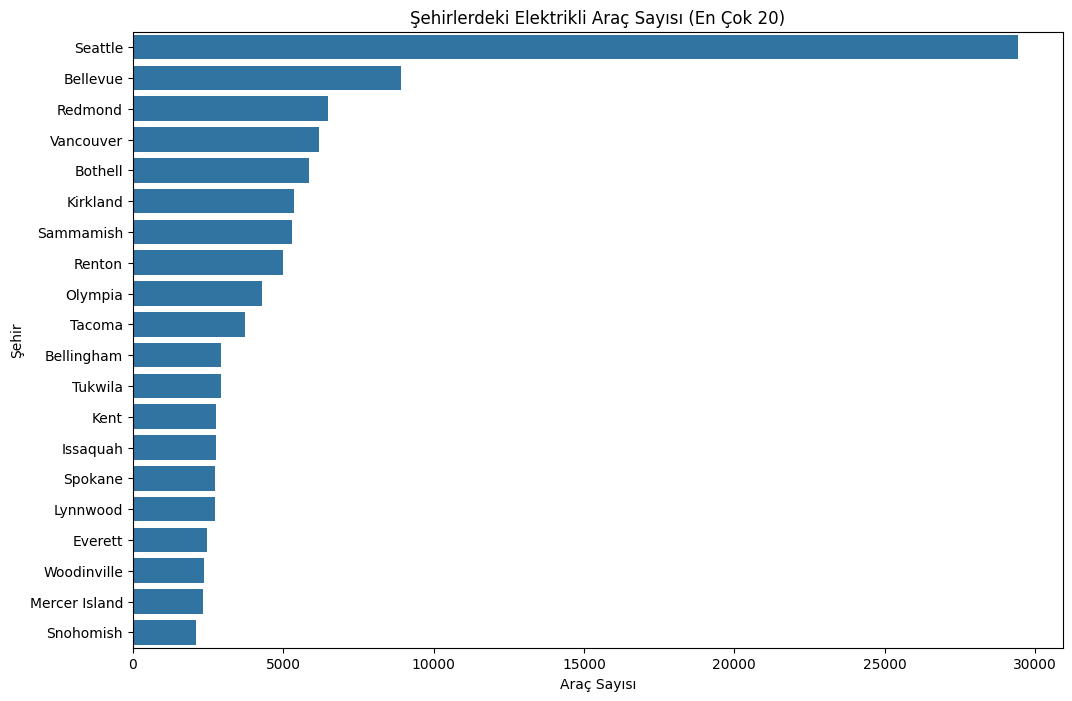

In [ ]:
# Şehirlerdeki elektrikli araçların sayısını bulma
city_vehicle_counts = df['City'].value_counts().head(20)

# Görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x=city_vehicle_counts.values, y=city_vehicle_counts.index)
plt.title('Şehirlerdeki Elektrikli Araç Sayısı (En Çok 20)')
plt.xlabel('Araç Sayısı')
plt.ylabel('Şehir')
plt.show()

In [ ]:
# Farklı şehirlerdeki araç modellerinin dağılımı
city_model_counts = df_cleaned.groupby(['City', 'Model']).size().unstack().fillna(0)

# En çok görülen 10 modeli belirleyin
top_models = city_model_counts.sum(axis=0).sort_values(ascending=False).index

# Sadece en çok görülen modelleri içeren bir dataframe oluşturun
city_model_counts_top = city_model_counts[top_models]

# Şehirlerde en çok görülen 10 modelin dağılımını içeren tabloyu yazdır
print("Şehirlerdeki En Çok Görülen 10 Elektrikli Araç Modelinin Dağılımı:")
print(city_model_counts_top)

# Alternatif olarak tabloyu HTML olarak görmek için
from IPython.display import display, HTML

display(HTML(city_model_counts_top.to_html()))

Output hidden; open in https://colab.research.google.com to view.

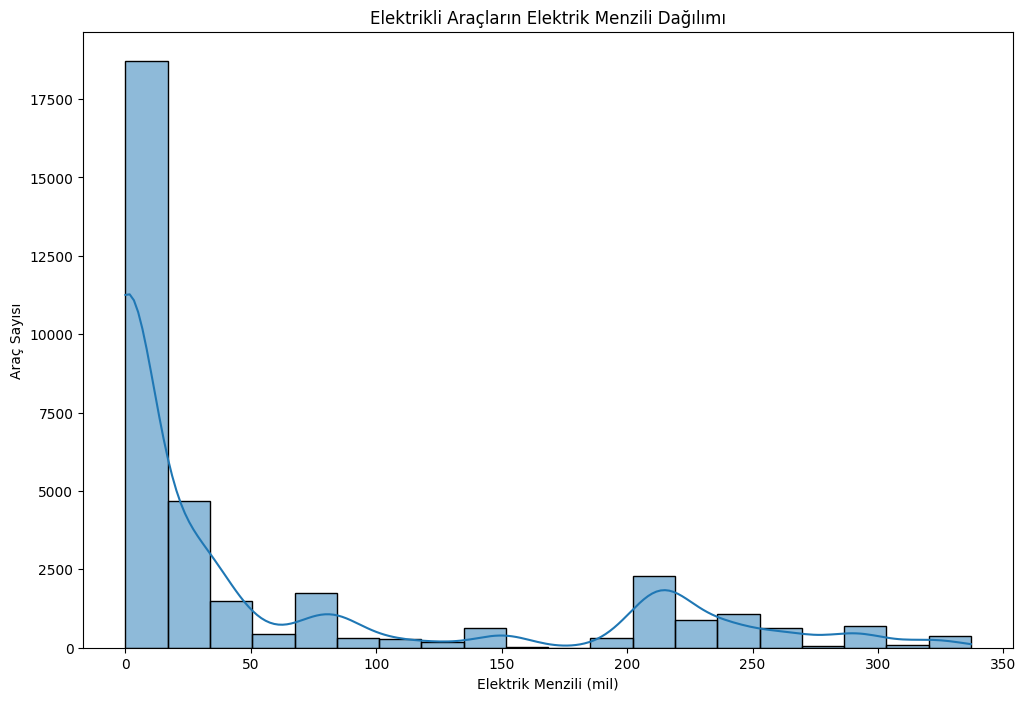

In [7]:
# Elektrik menzilleri ve çevresel etki
electric_range_distribution = df['Electric Range'].dropna()

plt.figure(figsize=(12, 8))
sns.histplot(electric_range_distribution, bins=20, kde=True)
plt.title('Elektrikli Araçların Elektrik Menzili Dağılımı')
plt.xlabel('Elektrik Menzili (mil)')
plt.ylabel('Araç Sayısı')
plt.show()


In [8]:
# Eksik verileri kontrol edelim
df.isnull().sum()

# Gerekirse eksik verileri temizleme
df = df.dropna(subset=['VIN (1-10)', 'County', 'City', 'State', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range'])

# Sütunları yeniden adlandırmak
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

In [9]:
# Hangi markalar ve modeller en yaygın?
make_model_counts = df.groupby(['make', 'model']).size().reset_index(name='counts')
make_model_counts = make_model_counts.sort_values(by='counts', ascending=False)
print(make_model_counts.head())

# Hangi yıllarda daha fazla EV kaydı var?
year_counts = df['model_year'].value_counts().sort_index()
print(year_counts)

          make    model  counts
113      TESLA  MODEL Y    7181
110      TESLA  MODEL 3    6170
97      NISSAN     LEAF    2644
111      TESLA  MODEL S    1474
31   CHEVROLET  BOLT EV    1272
model_year
2000        1
2002        1
2008        1
2010        9
2011      139
2012      263
2013      797
2014      634
2015      885
2016     1043
2017     1571
2018     2821
2019     2070
2020     2263
2021     3610
2022     5462
2023    11808
2024     1458
Name: count, dtype: int64


In [10]:
# Hangi bölgelerde daha fazla EV var?
county_counts = df['county'].value_counts()
print(county_counts.head())

# İlçe ve şehir bazında dağılım
city_counts = df.groupby(['county', 'city']).size().reset_index(name='counts')
city_counts = city_counts.sort_values(by='counts', ascending=False)
print(city_counts.head())

county
King         26127
Clark         3424
Snohomish     1753
Kitsap        1516
Thurston       986
Name: count, dtype: int64
   county       city  counts
74   King    Seattle    6590
44   King   Bellevue    3516
59   King   Kirkland    2529
12  Clark  Vancouver    2306
78   King    Tukwila    1808


In [11]:
# BEV ve PHEV türlerinin dağılımı
ev_type_counts = df['electric_vehicle_type'].value_counts()
print(ev_type_counts)

electric_vehicle_type
Battery Electric Vehicle (BEV)            27324
Plug-in Hybrid Electric Vehicle (PHEV)     7512
Name: count, dtype: int64


In [12]:
# Hangi elektrik sağlayıcıları daha fazla EV müşterisine sahip?
utility_counts = df['electric_utility'].value_counts()
print(utility_counts.head())

electric_utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                       17930
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                         8185
PUGET SOUND ENERGY INC                                               4296
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)     3370
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY           313
Name: count, dtype: int64


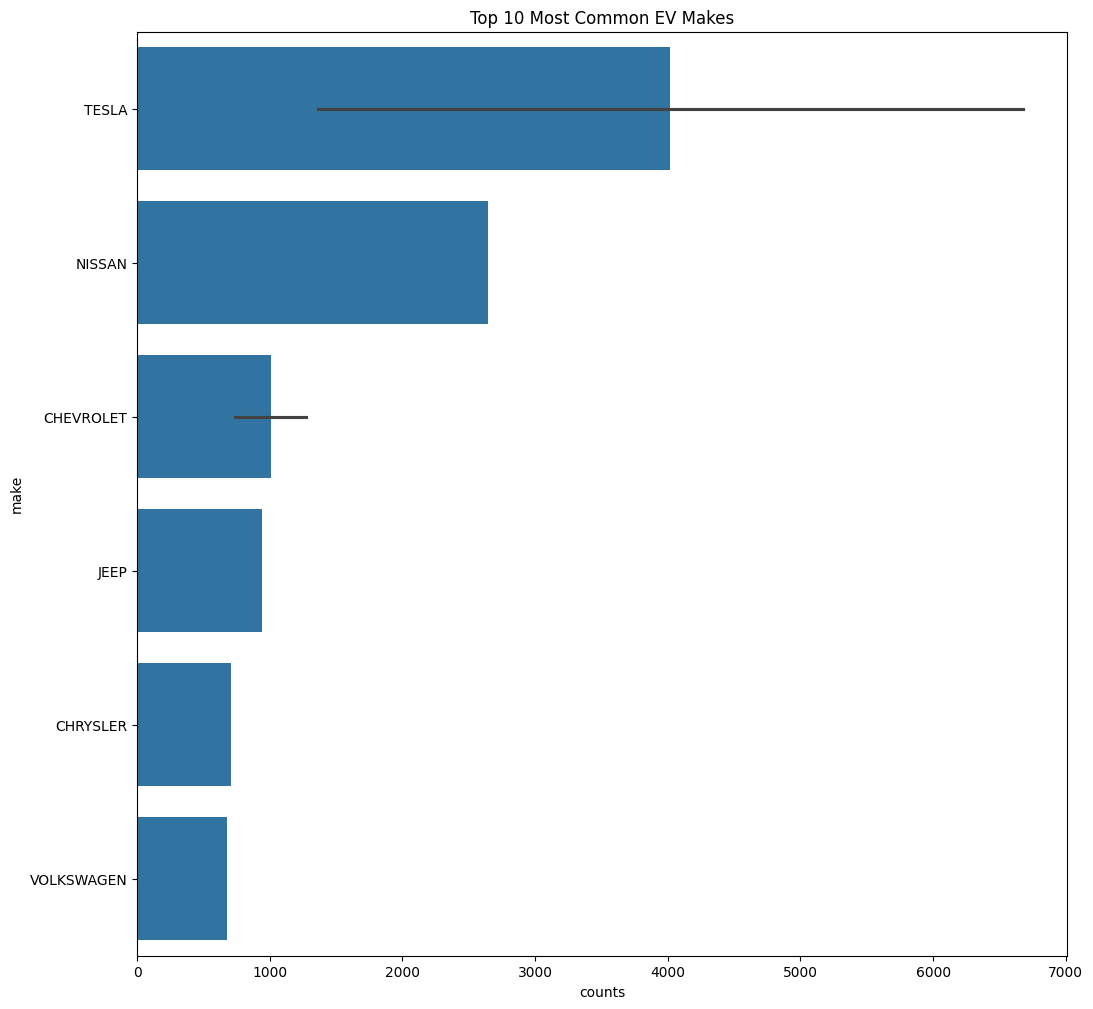

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Markaların ve modellerin yaygınlığını görselleştirelim
plt.figure(figsize=(12, 12))
sns.barplot(x='counts', y='make', data=make_model_counts.head(10))
plt.title('Top 10 Most Common EV Makes')
plt.show()

In [14]:
# Araç türü ve eyalete göre dağılımı hesaplayalım
vehicle_counts_by_state = df.groupby(['city', 'electric_vehicle_type']).size().unstack().fillna(0)
print(vehicle_counts_by_state)

electric_vehicle_type  Battery Electric Vehicle (BEV)  \
city                                                    
Algona                                            9.0   
Amboy                                             2.0   
Anacortes                                         2.0   
Ariel                                             4.0   
Arlington                                        32.0   
...                                               ...   
Yacolt                                           10.0   
Yakima                                          103.0   
Yarrow Point                                      1.0   
Yelm                                             72.0   
Zillah                                            4.0   

electric_vehicle_type  Plug-in Hybrid Electric Vehicle (PHEV)  
city                                                           
Algona                                                    4.0  
Amboy                                                     1.0  
An

In [15]:
import csv
with open('data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # Seattle'daki araçların sayısını saklayacak değişkeni tanımla
    seattle_arac_sayisi = 0

    # Her satırı kontrol et
    for row in reader:
        # Eğer aracın şehri "Seattle" ise, seattle_arac_sayisi'ni bir artır
        if row['City'] == 'Seattle':
            seattle_arac_sayisi += 1

# Sonuçları yazdır

print("Seattle'daki araç sayısı:", seattle_arac_sayisi)

Seattle'daki araç sayısı: 6590


In [17]:
from IPython.display import display, HTML
# Araç türü ve şehir bazında dağılımı hesaplayalım
vehicle_counts_by_city = df_cleaned.groupby(['City', 'Electric Vehicle Type']).size().unstack().fillna(0)
display(vehicle_counts_by_city)

# Şarj istasyonu ihtiyacını hesaplayalım
charging_station_needs = (vehicle_counts_by_city.sum(axis=1) * 0.01771871).astype(int)

# Şehir başına araç sayısını ve şarj istasyonu ihtiyacını içeren bir DataFrame oluşturalım
result_df = vehicle_counts_by_city.copy()
result_df['Charging Station Needs'] = charging_station_needs

# Tabloyu düzenli ve okunabilir şekilde gösterelim
print("Şehir başına araç sayısı ve şarj istasyonu ihtiyacı:")
print(result_df)

# Alternatif olarak tabloyu HTML olarak görmek için
display(HTML(result_df.to_html()))

# Pandas gösterim ayarlarını varsayılana döndürmek (isteğe bağlı)
pd.reset_option('display.max_rows')

# Toplam şarj istasyonu sayısını hesaplayalım
total_charging_stations = charging_station_needs.sum()

# Toplam şarj istasyonu sayısını gösterelim
print("\nToplam şarj istasyonu ihtiyacı:")
print(total_charging_stations)

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Algona,9.0,4.0
Amboy,2.0,1.0
Anacortes,2.0,1.0
Ariel,4.0,4.0
Arlington,32.0,14.0
...,...,...
Yacolt,10.0,3.0
Yakima,103.0,43.0
Yarrow Point,1.0,0.0


Şehir başına araç sayısı ve şarj istasyonu ihtiyacı:
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
City                                                    
Algona                                            9.0   
Amboy                                             2.0   
Anacortes                                         2.0   
Ariel                                             4.0   
Arlington                                        32.0   
...                                               ...   
Yacolt                                           10.0   
Yakima                                          103.0   
Yarrow Point                                      1.0   
Yelm                                             72.0   
Zillah                                            4.0   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  \
City                                                            
Algona                                                    4.0   
Amboy     

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV),Charging Station Needs
City,,,
Algona,9.0,4.0,0
Amboy,2.0,1.0,0
Anacortes,2.0,1.0,0
Ariel,4.0,4.0,0
Arlington,32.0,14.0,0
Auburn,305.0,61.0,6
Bainbridge Island,366.0,122.0,8
Battle Ground,161.0,63.0,3
Beaux Arts,28.0,8.0,0



Toplam şarj istasyonu ihtiyacı:
566


Seattle'daki araç sayısı: 29447
